# Bài 1
  <li>(Ví dụ 6.1) Từ các bộ dữ liệu huấn luyện được gán nhãn lớp từ cơ sở dữ liệu khách hàng của một cửa hàng điện tử, sử dụng khuếch đại thông tin, xây dựng cây quyết định cho thuộc tính <i>buys_computer</i>
    <table border="1"; align="center">
      <tr> <th>RID</th> <th>age</th> <th>income</th> <th>student</th> <th>credit_rating</th> <th>Class: buys_computer</th> </tr>
      <tr> <td>1</td> <td>youth</td> <td>high</td> <td>no</td> <td>fair</td> <td>no</td> </tr>
      <tr> <td>2</td> <td>youth</td> <td>high</td> <td>no</td> <td>excellent</td> <td>no</td> </tr>
      <tr> <td>3</td> <td>middle_aged</td> <td>high</td> <td>no</td> <td>fair</td> <td>yes</td> </tr>
      <tr> <td>4</td> <td>senior</td> <td>medium</td> <td>no</td> <td>fair</td> <td>yes</td> </tr>
      <tr> <td>5</td> <td>senior</td> <td>low</td> <td>yes</td> <td>fair</td> <td>yes</td> </tr>
      <tr> <td>6</td> <td>senior</td> <td>low</td> <td>yes</td> <td>excellent</td> <td>no</td> </tr>
      <tr> <td>7</td> <td>middle_aged</td> <td>low</td> <td>yes</td> <td>excellent</td> <td>yes</td> </tr>
      <tr> <td>8</td> <td>youth</td> <td>medium</td> <td>no</td> <td>fair</td> <td>no</td> </tr>
      <tr> <td>9</td> <td>youth</td> <td>low</td> <td>yes</td> <td>fair</td> <td>yes</td> </tr>
      <tr> <td>10</td> <td>senior</td> <td>medium</td> <td>yes</td> <td>fair</td> <td>yes</td> </tr>
      <tr> <td>11</td> <td>youth</td> <td>medium</td> <td>yes</td> <td>excellent</td> <td>yes</td> </tr>
      <tr> <td>12</td> <td>middle_aged</td> <td>medium</td> <td>no</td> <td>excellent</td> <td>yes</td> </tr>
      <tr> <td>13</td> <td>middle_aged</td> <td>high</td> <td>yes</td> <td>fair</td> <td>yes</td> </tr>
      <tr> <td>14</td> <td>senior</td> <td>medium</td> <td>no</td> <td>excellent</td> <td>no</td> </tr>
    </table>

  </li>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Tạo DataFrame từ các dữ liệu đã cho
data = {
    'age': ['youth', 'youth', 'middle_aged', 'senior', 'senior', 'senior', 'middle_aged', 'youth', 'youth', 'senior', 'youth', 'middle_aged', 'middle_aged', 'senior'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
df = pd.DataFrame(data)
print(df)

            age  income student credit_rating buys_computer
0         youth    high      no          fair            no
1         youth    high      no     excellent            no
2   middle_aged    high      no          fair           yes
3        senior  medium      no          fair           yes
4        senior     low     yes          fair           yes
5        senior     low     yes     excellent            no
6   middle_aged     low     yes     excellent           yes
7         youth  medium      no          fair            no
8         youth     low     yes          fair           yes
9        senior  medium     yes          fair           yes
10        youth  medium     yes     excellent           yes
11  middle_aged  medium      no     excellent           yes
12  middle_aged    high     yes          fair           yes
13       senior  medium      no     excellent            no


In [3]:
# Ánh xạ các thuộc tính từ chuỗi sang số
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df)

    age  income  student  credit_rating  buys_computer
0     2       0        0              1              0
1     2       0        0              0              0
2     0       0        0              1              1
3     1       2        0              1              1
4     1       1        1              1              1
5     1       1        1              0              0
6     0       1        1              0              1
7     2       2        0              1              0
8     2       1        1              1              1
9     1       2        1              1              1
10    2       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    1       2        0              0              0


In [4]:
# Tạo X và y từ DataFrame
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# Xây dựng cây quyết định
model = DecisionTreeClassifier()
model.fit(X, y)

# In ra cây quyết định đã xây dựng
print(model.tree_.feature)
print(model.tree_.threshold)


[ 0 -2  2  0  3 -2 -2 -2  3  1 -2 -2 -2]
[ 0.5 -2.   0.5  1.5  0.5 -2.  -2.  -2.   0.5  1.5 -2.  -2.  -2. ]


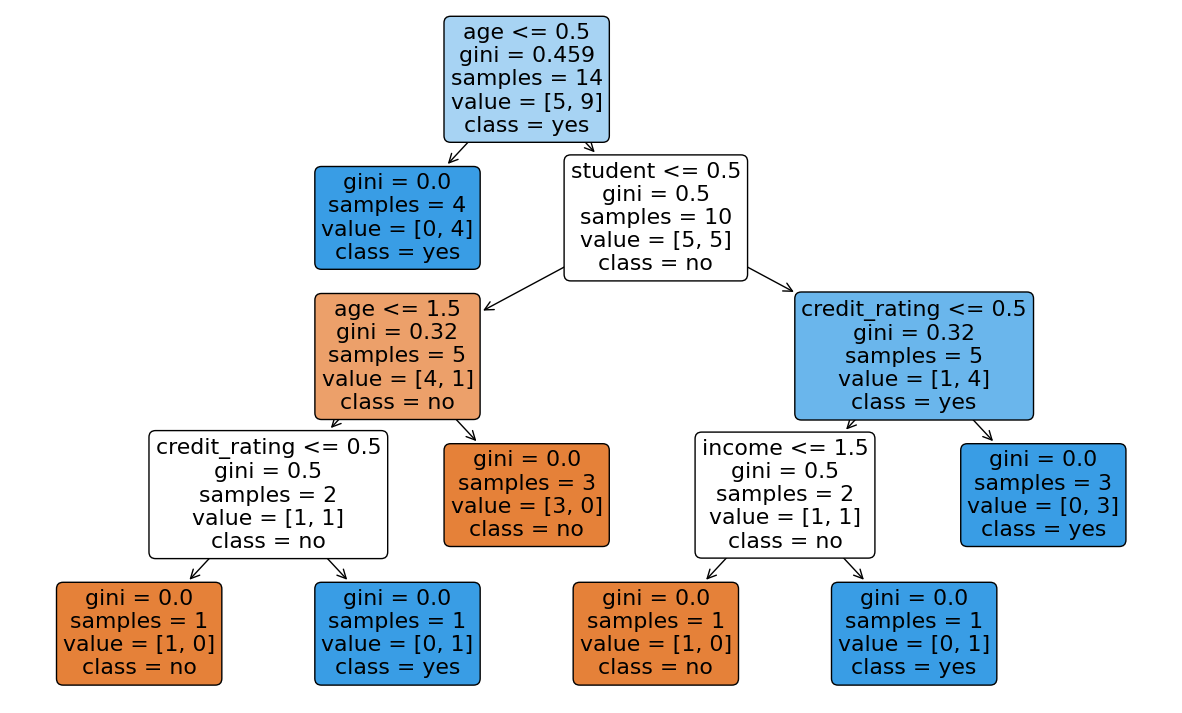

In [5]:
plt.figure(figsize=(15, 9))
plot_tree(model, filled=True, rounded=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

# Bài 2
<li>(6.7) Bảng sau chứa dữ liệu huấn luyện từ cơ sở dữ liệu nhân viên. Dữ liệu đã được tổng quát hóa. Ví dụ, "31...35" của <i>age</i> đại diện cho khoảng độ tuổi từ 31 đến 35. Đối với mỗi dòng dữ liệu, <it>count</it> chỉ số bộ dữ liệu có các giá trị của <i>department</i> (phòng ban), <i>status</i> (tình trạng), <i>age</i> (độ tuổi), và <i>salary</i> (lương) được cho dòng đó.
    <table border="1"; align="center">
      <tr> <th>department</th> <th>status</th> <th>age</th> <th>salary</th> <th>count</th> </tr>
      <tr> <td>sales</td> <td>senior</td> <td>31...35</td> <td>46K...50K</td> <td>30 ($30-i$)</td> </tr>
      <tr> <td>sales</td> <td>junior</td> <td>26...30</td> <td>26K...30K</td> <td>40 ($40-j$)</td> </tr>
      <tr> <td>sales</td> <td>junior</td> <td>31...35</td> <td>31K...35K</td> <td>40 ($40+j$)</td> </tr>
      <tr> <td>systems</td> <td>junior</td> <td>21...25</td> <td>46K...50K</td> <td>20 ($20-i$)</td> </tr>
      <tr> <td>systems</td> <td>senior</td> <td>31...35</td> <td>66K...70K</td> <td>5</td> </tr>
      <tr> <td>systems</td> <td>junior</td> <td>26...30</td> <td>46K...50K</td> <td>3</td> </tr>
      <tr> <td>systems</td> <td>senior</td> <td>41...45</td> <td>66K...70K</td> <td>3</td> </tr>
      <tr> <td>marketing</td> <td>senior</td> <td>36...40</td> <td>46K...50K</td> <td>10</td> </tr>
      <tr> <td>marketing</td> <td>junior</td> <td>31...35</td> <td>41K...45K</td> <td>4</td> </tr>
      <tr> <td>secretary</td> <td>senior</td> <td>46...50</td> <td>36K...40K</td> <td>4</td> </tr>
      <tr> <td>secretary</td> <td>junior</td> <td>26...30</td> <td>26K...30K</td> <td>6</td> </tr>
    </table>
    <p>Cho <i>status</i> là thuộc tính gán nhãn.</p>
    <ol>
      <li>Xây dựng cây quyết định từ dữ liệu đã cho</li>
      <li>Với bộ dữ liệu có giá trị "<i>systems</i>", "<i>26...30</i>", và "<i>46–50K</i>" của các thuộc tính tương ứng <i>department</i>, <i>age</i>, và <i>salary</i>, phân loại naïve Bayes của <i>status</i> cho bộ dữ liệu này là gì?</li>
    </ol>
  </li>
</ol>

In [23]:
data = {
    'department': ['sales', 'sales', 'sales', 'systems', 'systems', 'systems', 'marketing', 'marketing', 'secretary', 'secretary'],
    'status': ['senior', 'junior', 'junior', 'junior', 'senior', 'junior', 'senior', 'junior', 'senior', 'junior'],
    'age': ['31...35', '26...30', '31...35', '21...25', '31...35', '26...30', '41...45', '36...40', '46...50', '26...30'],
    'salary': ['46K...50K', '26K...30K', '31K...35K', '46K...50K', '66K...70K', '46K...50K', '66K...70K', '46K...50K', '36K...40K', '26K...30K'],
    'count': [30, 40, 40, 20, 5, 3, 3, 10, 4, 6]
}
df = pd.DataFrame(data)
print(df)

  department  status      age     salary  count
0      sales  senior  31...35  46K...50K     30
1      sales  junior  26...30  26K...30K     40
2      sales  junior  31...35  31K...35K     40
3    systems  junior  21...25  46K...50K     20
4    systems  senior  31...35  66K...70K      5
5    systems  junior  26...30  46K...50K      3
6  marketing  senior  41...45  66K...70K      3
7  marketing  junior  36...40  46K...50K     10
8  secretary  senior  46...50  36K...40K      4
9  secretary  junior  26...30  26K...30K      6


In [7]:
le = LabelEncoder()

df['department'] = le.fit_transform(df['department'])
df['status'] = le.fit_transform(df['status'])
df['age'] = le.fit_transform(df['age'])
df['salary'] = le.fit_transform(df['salary'])
print(df)

   department  status  age  salary  count
0           1       1    2       3     30
1           1       0    1       0     40
2           1       0    2       1     40
3           3       0    0       3     20
4           3       1    2       4      5
5           3       0    1       3      3
6           0       1    4       4      3
7           0       0    3       3     10
8           2       1    5       2      4
9           2       0    1       0      6


In [8]:
X = df.drop('status', axis=1)
y = df['status']

model = DecisionTreeClassifier()
model.fit(X, y)

# In ra cây quyết định đã xây dựng
print(model.tree_.feature)
print(model.tree_.threshold)

[ 1 -2  3 -2  3 -2  2 -2 -2]
[ 1.5 -2.   7.5 -2.  20.  -2.   2.  -2.  -2. ]


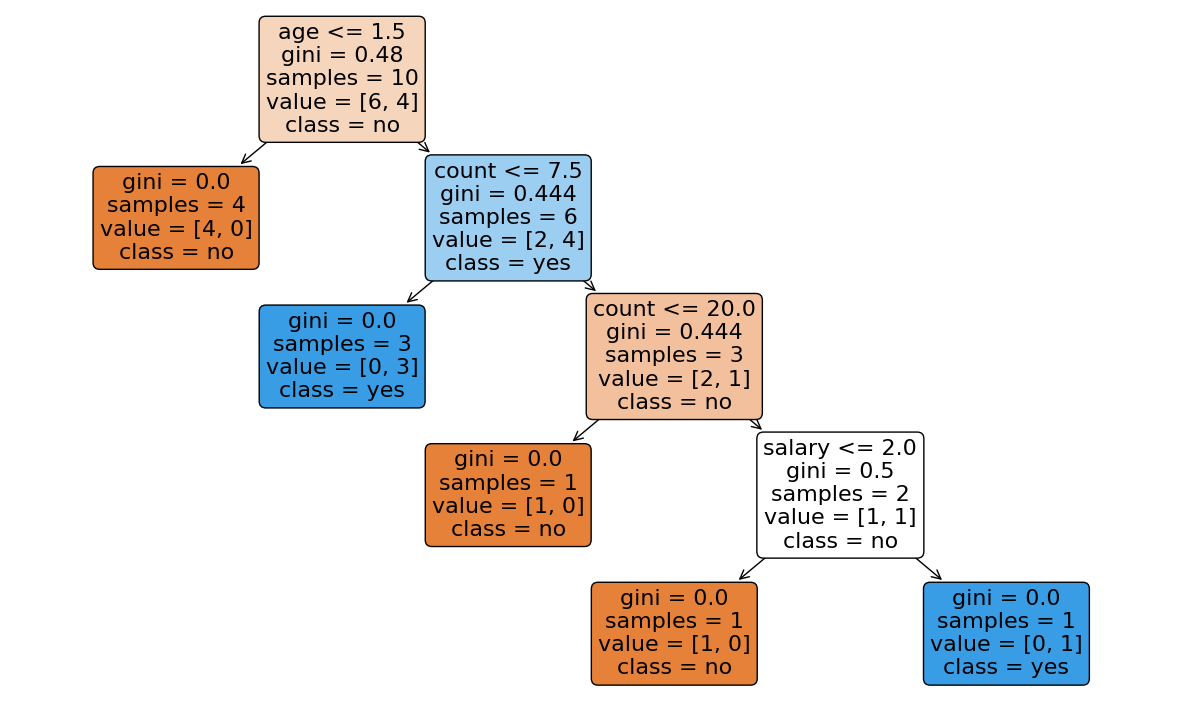

In [9]:
plt.figure(figsize=(15, 9))
plot_tree(model, filled=True, rounded=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

In [12]:
# Tính xác suất tiên nghiệm
prior_prob = df.groupby('status')['count'].sum() / df['count'].sum()

# Tính xác suất hậu nghiệm
posterior_prob = df.groupby(['status', 'department', 'age', 'salary'])['count'].sum() / df.groupby('status')['count'].sum()

# Dự đoán
department = 'systems'
age = '26...30'
salary = '46K...50K'

# Tính xác suất cho mỗi lớp
probabilities = prior_prob * posterior_prob.loc[:, department, age, salary]

# Chọn lớp có xác suất cao nhất
prediction = probabilities.idxmax()

print("Phân loại Naive Bayes của status cho bộ dữ liệu này là:", prediction)

Phân loại Naive Bayes của status cho bộ dữ liệu này là: junior
